In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import os

os.chdir('data')

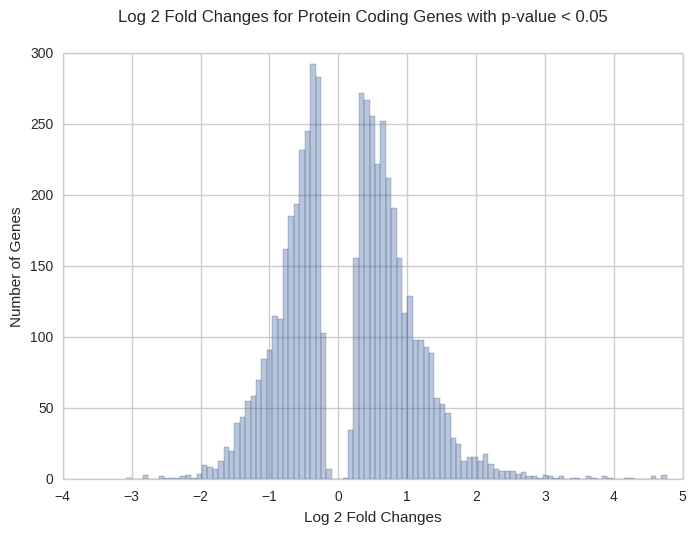

In [2]:
# Load the RNA-seq differentially expressed genes data
datHunt = pd.read_table('huntDE.txt')

# Slice the data by the adjusted p-value
lowPValHunt = datHunt[datHunt['padj'] < 0.05]
sns.set_style('whitegrid')

# Generate the distribution plot of the differentially expressed genes
log2FCData = lowPValHunt['log2FoldChange']
log2FCPlot = sns.distplot(log2FCData, kde=False, bins=100)

# Label the distribution plot
log2FCPlot.set(xlabel='Log 2 Fold Changes', ylabel='Number of Genes')
sns.plt.suptitle('Log 2 Fold Changes for Protein Coding Genes with p-value < 0.05')

In [5]:
# Load the RNA-seq differentially expressed genes data
datPD = pd.read_table('parkinsonDE.txt')

# Slice the data by the adjusted p-value
lowPValPD = datPD[datPD['padj'] < 0.05]
lowPValPD.shape

(1095, 8)

In [22]:
totalGenesHunt = datHunt.shape[0]
totalPvHunt = lowPValHunt.shape[0]
PVLGenesRat = totalPvHunt/totalGenesHunt * 100
upRegGenes = len(lowPValHunt[lowPValHunt['log2FoldChange'] > 0])
downRegGenes = len(lowPValHunt['log2FoldChange']) - len(lowPValHunt[lowPValHunt['log2FoldChange'] > 0])
upRegGenesRat = upRegGenes/len(lowPValHunt['log2FoldChange']) * 100
downRegGenesRat = 100 - upRegGenesRat

print('Total number of genes: ' + str(totalGenesHunt))
print('Total number of genes with p-value < 0.05: ' + str(totalPvHunt) + ', ' + str(round(PVLGenesRat, 2)) + '%')
print('Number of up regulated genes: ' + str(upRegGenes) + ', ' + str(round(upRegGenesRat, 2)) + '%')
print('Number of down regulated genes: ' + str(downRegGenes) + ', ' + str(round(downRegGenesRat, 2)) + '%')

Total number of genes: 28087
Total number of genes with p-value < 0.05: 5480, 19.51%
Number of up regulated genes: 3004, 54.82%
Number of down regulated genes: 2476, 45.18%


In [27]:
totalGenesPD = len(datPD)
intersectTotalPH = set(datPD['symbol']).intersection(datHunt['symbol'])
print(len((intersectTotalPH)))

totalPvPD = len(lowPValPD)
intersectPvPH = set(lowPValPD['symbol']).intersection(lowPValHunt['symbol'])
len(intersectPvPH)

intersectPvalTotHunt = totalGenesHunt - totalPvHunt


17308


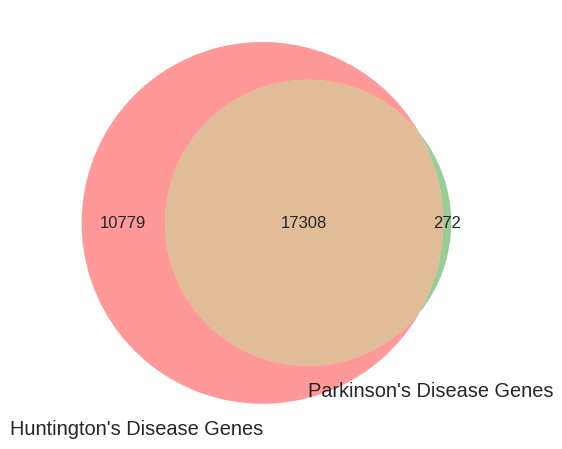

In [28]:
totGenesHuntPD = [totalGenesHunt-len(intersectTotalPH), totalGenesPD-len(intersectTotalPH), len(intersectTotalPH)]
totGenesHuntPDVenn = venn2(totGenesHuntPD, ['Huntington\'s Disease Genes', 'Parkinson\'s Disease Genes'])

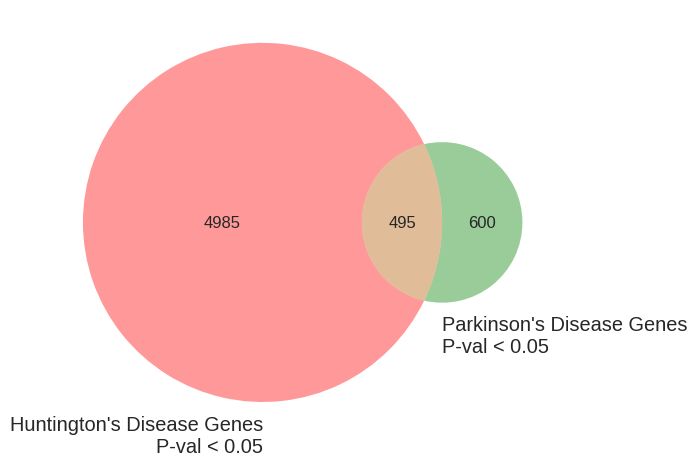

In [39]:
totPvHuntPD = [totalPvHunt-len(intersectPvPH), totalPvPD-len(intersectPvPH), len(intersectPvPH)]
totGenesHuntPDVenn = venn2(totPvHuntPD, ['Huntington\'s Disease Genes\nP-val < 0.05', 'Parkinson\'s Disease Genes\nP-val < 0.05'])